In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
gdp_data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv'

In [46]:
# reading table from the url
marvel = pd.read_csv(gdp_data_url)

In [47]:
# reading a sample of marvel DF
marvel.head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [48]:
# converting all labels to lowercase and removing whitespace in between
marvel.columns = [col.lower() for col in marvel.columns.tolist()]
marvel.columns = [col.replace(' ', '_') for col in marvel.columns.tolist()]

## Handling Null Values

In [49]:
# checking for presesnce of NaN's in all columns
marvel.isna().any()

page_id             False
name                False
urlslug             False
id                   True
align                True
eye                  True
hair                 True
sex                  True
gsm                  True
alive                True
appearances          True
first_appearance     True
year                 True
dtype: bool

In [50]:
# ratio of Null vaues
na_features = [feature for feature in marvel.columns if marvel[feature].isna().sum() > 0]
for feature in na_features:
    print(feature)
    print(marvel[feature].isna().sum() / len(marvel), '\n')

id
0.23021494870542256 

align
0.17171470444553005 

eye
0.5964215925744992 

hair
0.26038104543234003 

sex
0.052149487054225695 

gsm
0.9945041524181729 

alive
0.00018319491939423546 

appearances
0.06692721055202736 

first_appearance
0.04976795310210064 

year
0.04976795310210064 



Eye and GSM columns have quite high percentage of Null values. Therefore we can drop them.

In [51]:
marvel.drop(columns=['eye', 'gsm'], inplace=True)

In [52]:
# handling NaN's in leftover categorical columnns
marvel.loc[:,['id', 'align', 'hair', 'sex', 'alive', 'first_appearance']] = marvel.loc[:,
            ['id', 'align', 'hair', 'sex', 'alive', 'first_appearance']].fillna('Unknown')

In [53]:
# handling NaN's in float type column
marvel.loc[:,['appearances', 'year']] = marvel.fillna({'appearances': np.abs(np.median(marvel.appearances)), 
                                                       'year': np.abs(np.mean(marvel.year))})

In [54]:
# checking for presesnce of NaN's in all columns
marvel.isna().any()

page_id             False
name                False
urlslug             False
id                  False
align               False
hair                False
sex                 False
alive               False
appearances          True
first_appearance    False
year                False
dtype: bool

In [55]:
# reading a sample of marvel DF
marvel.head(5)

,page_id,name,urlslug,id,align,hair,sex,alive,appearances,first_appearance,year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


## Handling Rare Categorical Variables

In [56]:
categorical_features = [feature for feature in marvel.columns if marvel[feature].dtype == 'O']
categorical_features.remove('urlslug')
categorical_features.remove('name')
categorical_features.remove('first_appearance')
categorical_features

['id', 'align', 'hair', 'sex', 'alive']

In [57]:
for feature in categorical_features:
    print(marvel[feature].value_counts() / len(marvel), '\n')

Secret Identity                  0.383183
Public Identity                  0.276502
Unknown                          0.230215
No Dual Identity                 0.109184
Known to Authorities Identity    0.000916
Name: id, dtype: float64 

Bad Characters        0.410357
Good Characters       0.283097
Unknown               0.171715
Neutral Characters    0.134831
Name: align, dtype: float64 

Unknown                  0.260381
Black Hair               0.229299
Brown Hair               0.142831
Blond Hair               0.096605
No Hair                  0.071812
Bald                     0.051172
White Hair               0.046043
Red Hair                 0.037860
Grey Hair                0.032426
Green Hair               0.007145
Auburn Hair              0.004763
Blue Hair                0.003420
Strawberry Blond Hair    0.002870
Purple Hair              0.002870
Orange Hair              0.002626
Variable Hair            0.001954
Pink Hair                0.001893
Yellow Hair              0.0012

In [58]:
for feature in categorical_features:
    temp = marvel[feature].value_counts() / len(marvel)
    temp = temp[temp < 0.05].index
    marvel[feature] = np.where(marvel[feature].isin(temp), 'Others', marvel[feature])

In [59]:
for feature in categorical_features:
    print(marvel[feature].value_counts() / len(marvel), '\n')

Secret Identity     0.383183
Public Identity     0.276502
Unknown             0.230215
No Dual Identity    0.109184
Others              0.000916
Name: id, dtype: float64 

Bad Characters        0.410357
Good Characters       0.283097
Unknown               0.171715
Neutral Characters    0.134831
Name: align, dtype: float64 

Unknown       0.260381
Black Hair    0.229299
Others        0.147899
Brown Hair    0.142831
Blond Hair    0.096605
No Hair       0.071812
Bald          0.051172
Name: hair, dtype: float64 

Male Characters      0.710674
Female Characters    0.234306
Unknown              0.052149
Others               0.002870
Name: sex, dtype: float64 

Living Characters      0.769907
Deceased Characters    0.229910
Others                 0.000183
Name: alive, dtype: float64 



## Exploratory Data Analysis

### Gender distribution in MCU

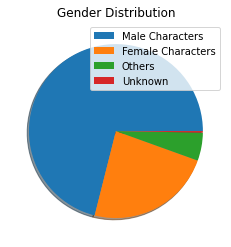

In [60]:
marvel.sex.value_counts()
_ = plt.pie(marvel.sex.value_counts(), shadow=True)
_ = plt.legend(marvel.sex.unique())
_ = plt.title('Gender Distribution')

Marvel Universe is dominated by Male Characters which accounts for about 75% of the total characters.

### Gender-wise Identity distribution

In [61]:
gender_id = marvel.groupby('id').sex.value_counts()
gender_id.name = 'count'
gender_id = gender_id.reset_index()
gender_id = gender_id.pivot(index='id', columns= 'sex', values='count')
gender_id.fillna(0)

sex,Female Characters,Male Characters,Others,Unknown
id,,,,
No Dual Identity,486.0,1246.0,12.0,44.0
Others,5.0,9.0,1.0,0.0
Public Identity,1051.0,3367.0,5.0,105.0
Secret Identity,1505.0,4506.0,15.0,249.0
Unknown,790.0,2510.0,14.0,456.0


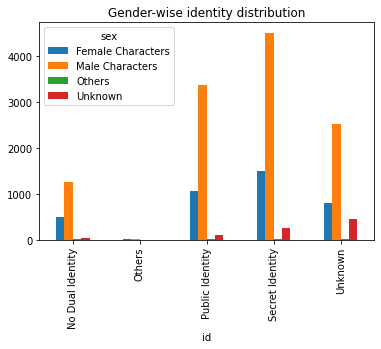

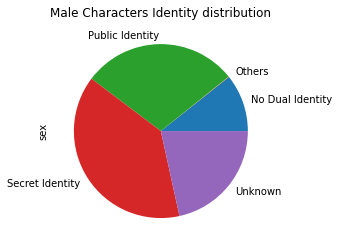

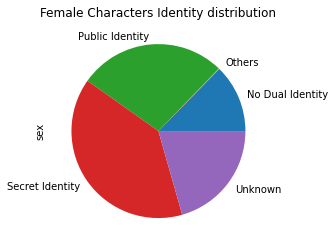

In [62]:
_ = gender_id.plot(kind='bar', title='Gender-wise identity distribution')
plt.show()
_ = marvel[marvel.sex == 'Male Characters'].groupby('id').sex.count().plot.pie()
plt.title('Male Characters Identity distribution')
plt.show()
_ = marvel[marvel.sex == 'Female Characters'].groupby('id').sex.count().plot.pie()
plt.title('Female Characters Identity distribution')
plt.show()

Most of the Marvel heros prefer to keep their identity secret while some do disclose their identity. Also, both male and female characters have similar identity distribution.

### Feature-wise number of appearances

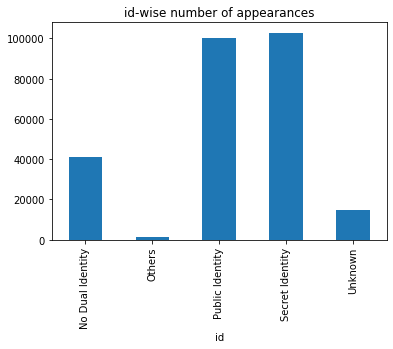

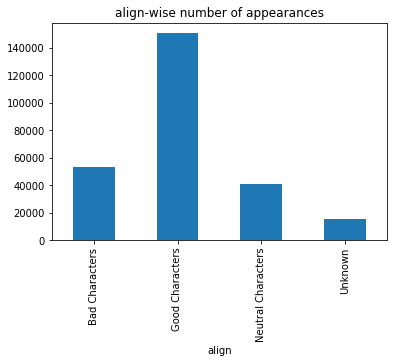

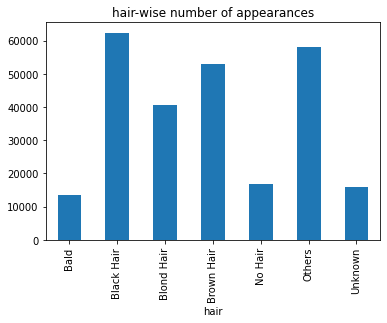

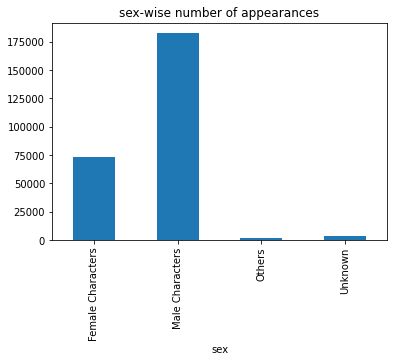

In [66]:
for feature in ['id', 'align', 'hair', 'sex']:
    _ = np.round(marvel.groupby(feature).appearances.sum()).plot.bar()
    _ = plt.title('{}-wise number of appearances'.format(feature))
    plt.show()

Characters with Secret Identity have made most appearances, closely followed by characters with Public Identity.

Good characters are most popular among fans. Also, Male characters have also made most appearance.

### Gender-wise Personality Analysis


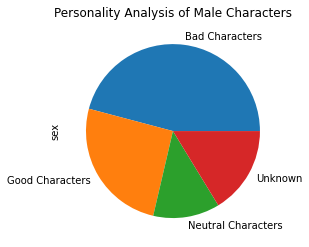

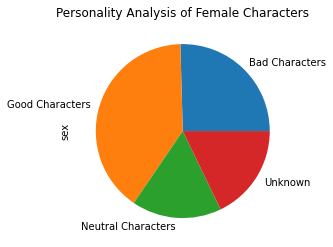

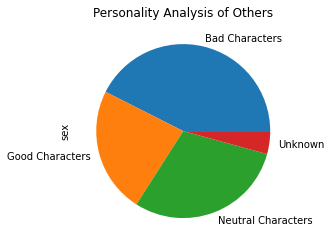

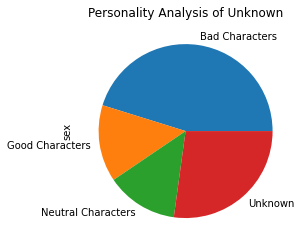

In [64]:
for gender in marvel.sex.unique():
    marvel[marvel.sex == gender].groupby('align').sex.count().plot.pie()
    plt.title('Personality Analysis of {}'.format(gender))
    plt.show()

- Most of the male characters are of bad nature whereas most of the female characters have good personality.
- Genderfluid characters are either good or neutral.
Most of the agender characters are either neutral or bad.

### Identity-wise Personality Analysis

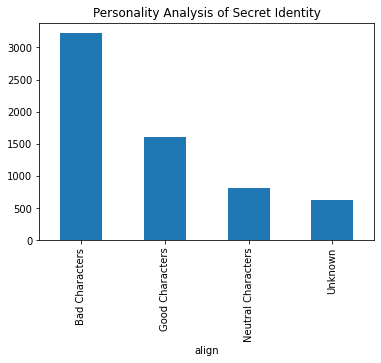

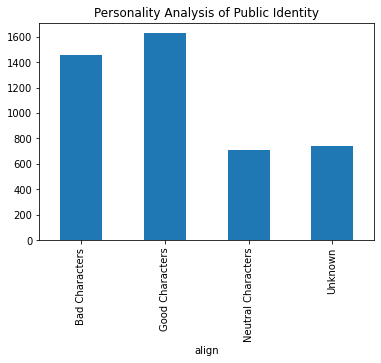

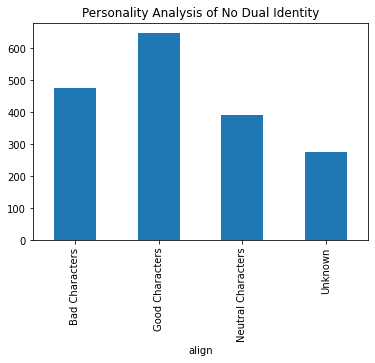

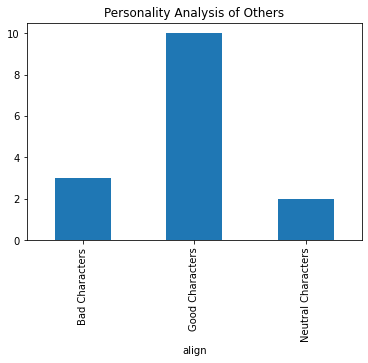

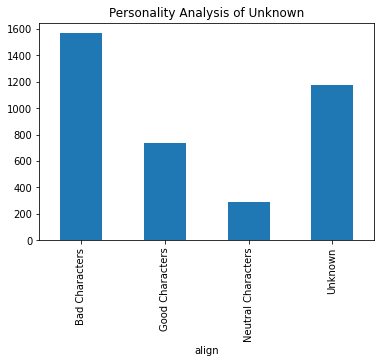

In [65]:
for identity in marvel.id.unique():
    marvel[marvel.id == identity].groupby('align').sex.count().plot.bar()
    plt.title('Personality Analysis of {}'.format(identity))
    plt.show()

Most characters with secret identity are bad natured while most characters whose identity is known to the authorities have a good personality. 